# 5. Missingness report by racial and ethnic groups

*João Matos, A Ian Wong*

28 Feb, 2024

MIT License

## Instructions

1. Please replace the directory from where the BOLD data is being loaded with pd.read_csv()

## imports and defines

In [2]:
import missingno as msno
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%config InlineBackend.figure_format = 'retina'

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
bold = pd.read_csv("/content/drive/MyDrive/open source pulse oximetry data (w o waveform)/data/final/pulseOx_dataset.csv")

## functions

In [10]:
def rename_columns(dataframe, column_names_old, column_names_new):
    column_mapping = dict(zip(column_names_old, column_names_new))
    dataframe.rename(columns=column_mapping, inplace=True)

# Your first list here
column_names_old = [
    'subject_id', 'hospital_admission_id', 'icustay_id', 'source_db', 'hospitalid', 'numbedscategory',
    'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'height_admission',
    'BMI_admission', 'datetime_hospital_admit', 'datetime_hospital_discharge', 'datetime_icu_admit',
    'datetime_icu_discharge', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value',
    'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2',
    'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'vitals_heart_rate', 'vitals_resp_rate',
    'vitals_mbp_ni', 'vitals_sbp_ni', 'vitals_dbp_ni', 'vitals_mbp_i', 'vitals_sbp_i', 'vitals_dbp_i',
    'vitals_tempc', 'cbc_hemoglobin', 'cbc_hematocrit', 'cbc_mch', 'cbc_mchc', 'cbc_mcv', 'cbc_platelet',
    'cbc_rbc', 'cbc_rdw', 'cbc_wbc', 'coag_fibrinogen', 'coag_inr', 'coag_pt', 'coag_ptt', 'bmp_sodium',
    'bmp_potassium', 'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun', 'bmp_creatinine', 'bmp_glucose',
    'bmp_aniongap', 'bmp_calcium', 'bmp_lactate', 'hfp_alt', 'hfp_alp', 'hfp_ast', 'hfp_bilirubin_total',
    'hfp_bilirubin_direct', 'hfp_albumin', 'others_ck_cpk', 'others_ck_mb', 'others_ld_ldh',
    'sofa_past_overall_24hr', 'sofa_past_coagulation_24hr',
    'sofa_past_liver_24hr', 'sofa_past_cardiovascular_24hr', 'sofa_past_cns_24hr', 'sofa_past_renal_24hr',
    'sofa_future_overall_24hr', 'sofa_future_coagulation_24hr', 'sofa_future_liver_24hr',
    'sofa_future_cardiovascular_24hr', 'sofa_future_cns_24hr', 'sofa_future_renal_24hr'
]

# Your second list here
column_names_new = [
    'Subject ID', 'Hospital Admission ID', 'ICU Stay ID', 'Source Database', 'Hospital ID', 'Number of Beds Category',
    'Teaching Status', 'US Census Region', 'Admission Age', 'Female Sex', 'Admission Weight', 'Admission Height',
    'Admission BMI', 'Datetime of Hospital Admission', 'Datetime of Hospital Discharge', 'Datetime of ICU Admission',
    'Datetime of ICU Discharge', 'LOS Hospital', 'LOS ICU', 'Comorbidity Score Name', 'Comorbidity Score (Charlson/Elixhauser)',
    'In-Hospital Mortality', 'Race-Ethnicity', 'SaO2 Timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2',
    'Carboxyhemoglobin', 'Methemoglobin', 'SpO2 Timestamp', 'Vitals Heart Rate', 'Vitals Resp Rate',
    'Vitals niMBP', 'Vitals niSBP', 'Vitals niDBP', 'Vitals iMBP', 'Vitals iSBP', 'Vitals iDBP',
    'Vitals Temp', 'CBC Hemoglobin', 'CBC Hematocrit', 'CBC MCH', 'CBC MCHC', 'CBC MCV', 'CBC Platelets',
    'CBC RBC', 'CBC RDW', 'CBC WBC', 'Coagulation Fibrinogen', 'Coagulation INR', 'Coagulation PT', 'Coagulation PTT', 'Sodium',
    'Potassium', 'Chloride', 'Bicarbonate', 'Blood Urea Nitrogen', 'Creatinine', 'Glucose',
    'Anion-gap', 'Calcium', 'Lactate', 'Alanine Transaminase', 'Alkaline Phosphatase', 'Aspartate Transaminase', 'Bilirubin Total',
    'Bilirubin Direct', 'Albumin', 'Creatine Kinase', 'Creatine Kinase MB', 'Lactate Dehydrogenase',
    'SOFA Past Overall 24hr', 'SOFA Past Coagulation 24hr',
    'SOFA Past Liver 24hr', 'SOFA Past Cardiovascular 24hr', 'SOFA Past CNS 24hr', 'SOFA Past Renal 24hr',
    'SOFA Future Overall 24hr', 'SOFA Future Coagulation 24hr', 'SOFA Future Liver 24hr',
    'SOFA Future Cardiovascular 24hr', 'SOFA Future CNS 24hr', 'SOFA Future Renal 24hr'
]

# Define columns of interest
columns_retained = [
    'subject_id', 'hospital_admission_id', 'icustay_id', 'source_db', 'hospitalid', 'numbedscategory',
    'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'datetime_hospital_admit',
    'datetime_hospital_discharge', 'datetime_icu_admit', 'datetime_icu_discharge', 'los_hospital', 'los_ICU',
    'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp',
    'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'cbc_hemoglobin', 'coag_fibrinogen', 'coag_inr', 'coag_pt',
    'coag_ptt', 'bmp_sodium', 'bmp_potassium', 'bmp_chloride', 'bmp_bicarbonate', 'bmp_bun', 'bmp_creatinine',
    'bmp_glucose', 'bmp_lactate', 'hfp_alt', 'hfp_alp', 'hfp_ast', 'hfp_bilirubin_total', 'hfp_albumin',
    'others_ck_cpk', 'sofa_past_overall_24hr', 'sofa_future_overall_24hr'
]

In [27]:
def plot_missingness(bold, group="Overall"):
  mdf = bold[[column for column in bold.columns if not column.startswith('delta_')]]

  # Retain only columns of interest
  mdf = mdf[columns_retained]

  # Call the function to rename the columns
  rename_columns(mdf, column_names_old, column_names_new)

  # Plot Missingness Bar Chart

  mdf_sorted = msno.nullity_sort(mdf, sort='descending') # or sort='ascending'
  bar = msno.bar(mdf_sorted, filter='top', sort='descending', fontsize = 18,  label_rotation=45)

  #bar.axes[0].tick_params(axis='y', labelsize=30)

  # Modify y-axis labels to percentages
  plt.yticks(np.arange(0, 1.1, 0.1), [str(int(x * 100)) + '%' for x in np.arange(0, 1.1, 0.1)])
  plt.title(f"Covariates' Completeness\n {group} (N = {format(len(bold), ',')})\n", fontsize=30)
  plt.show()

## overall

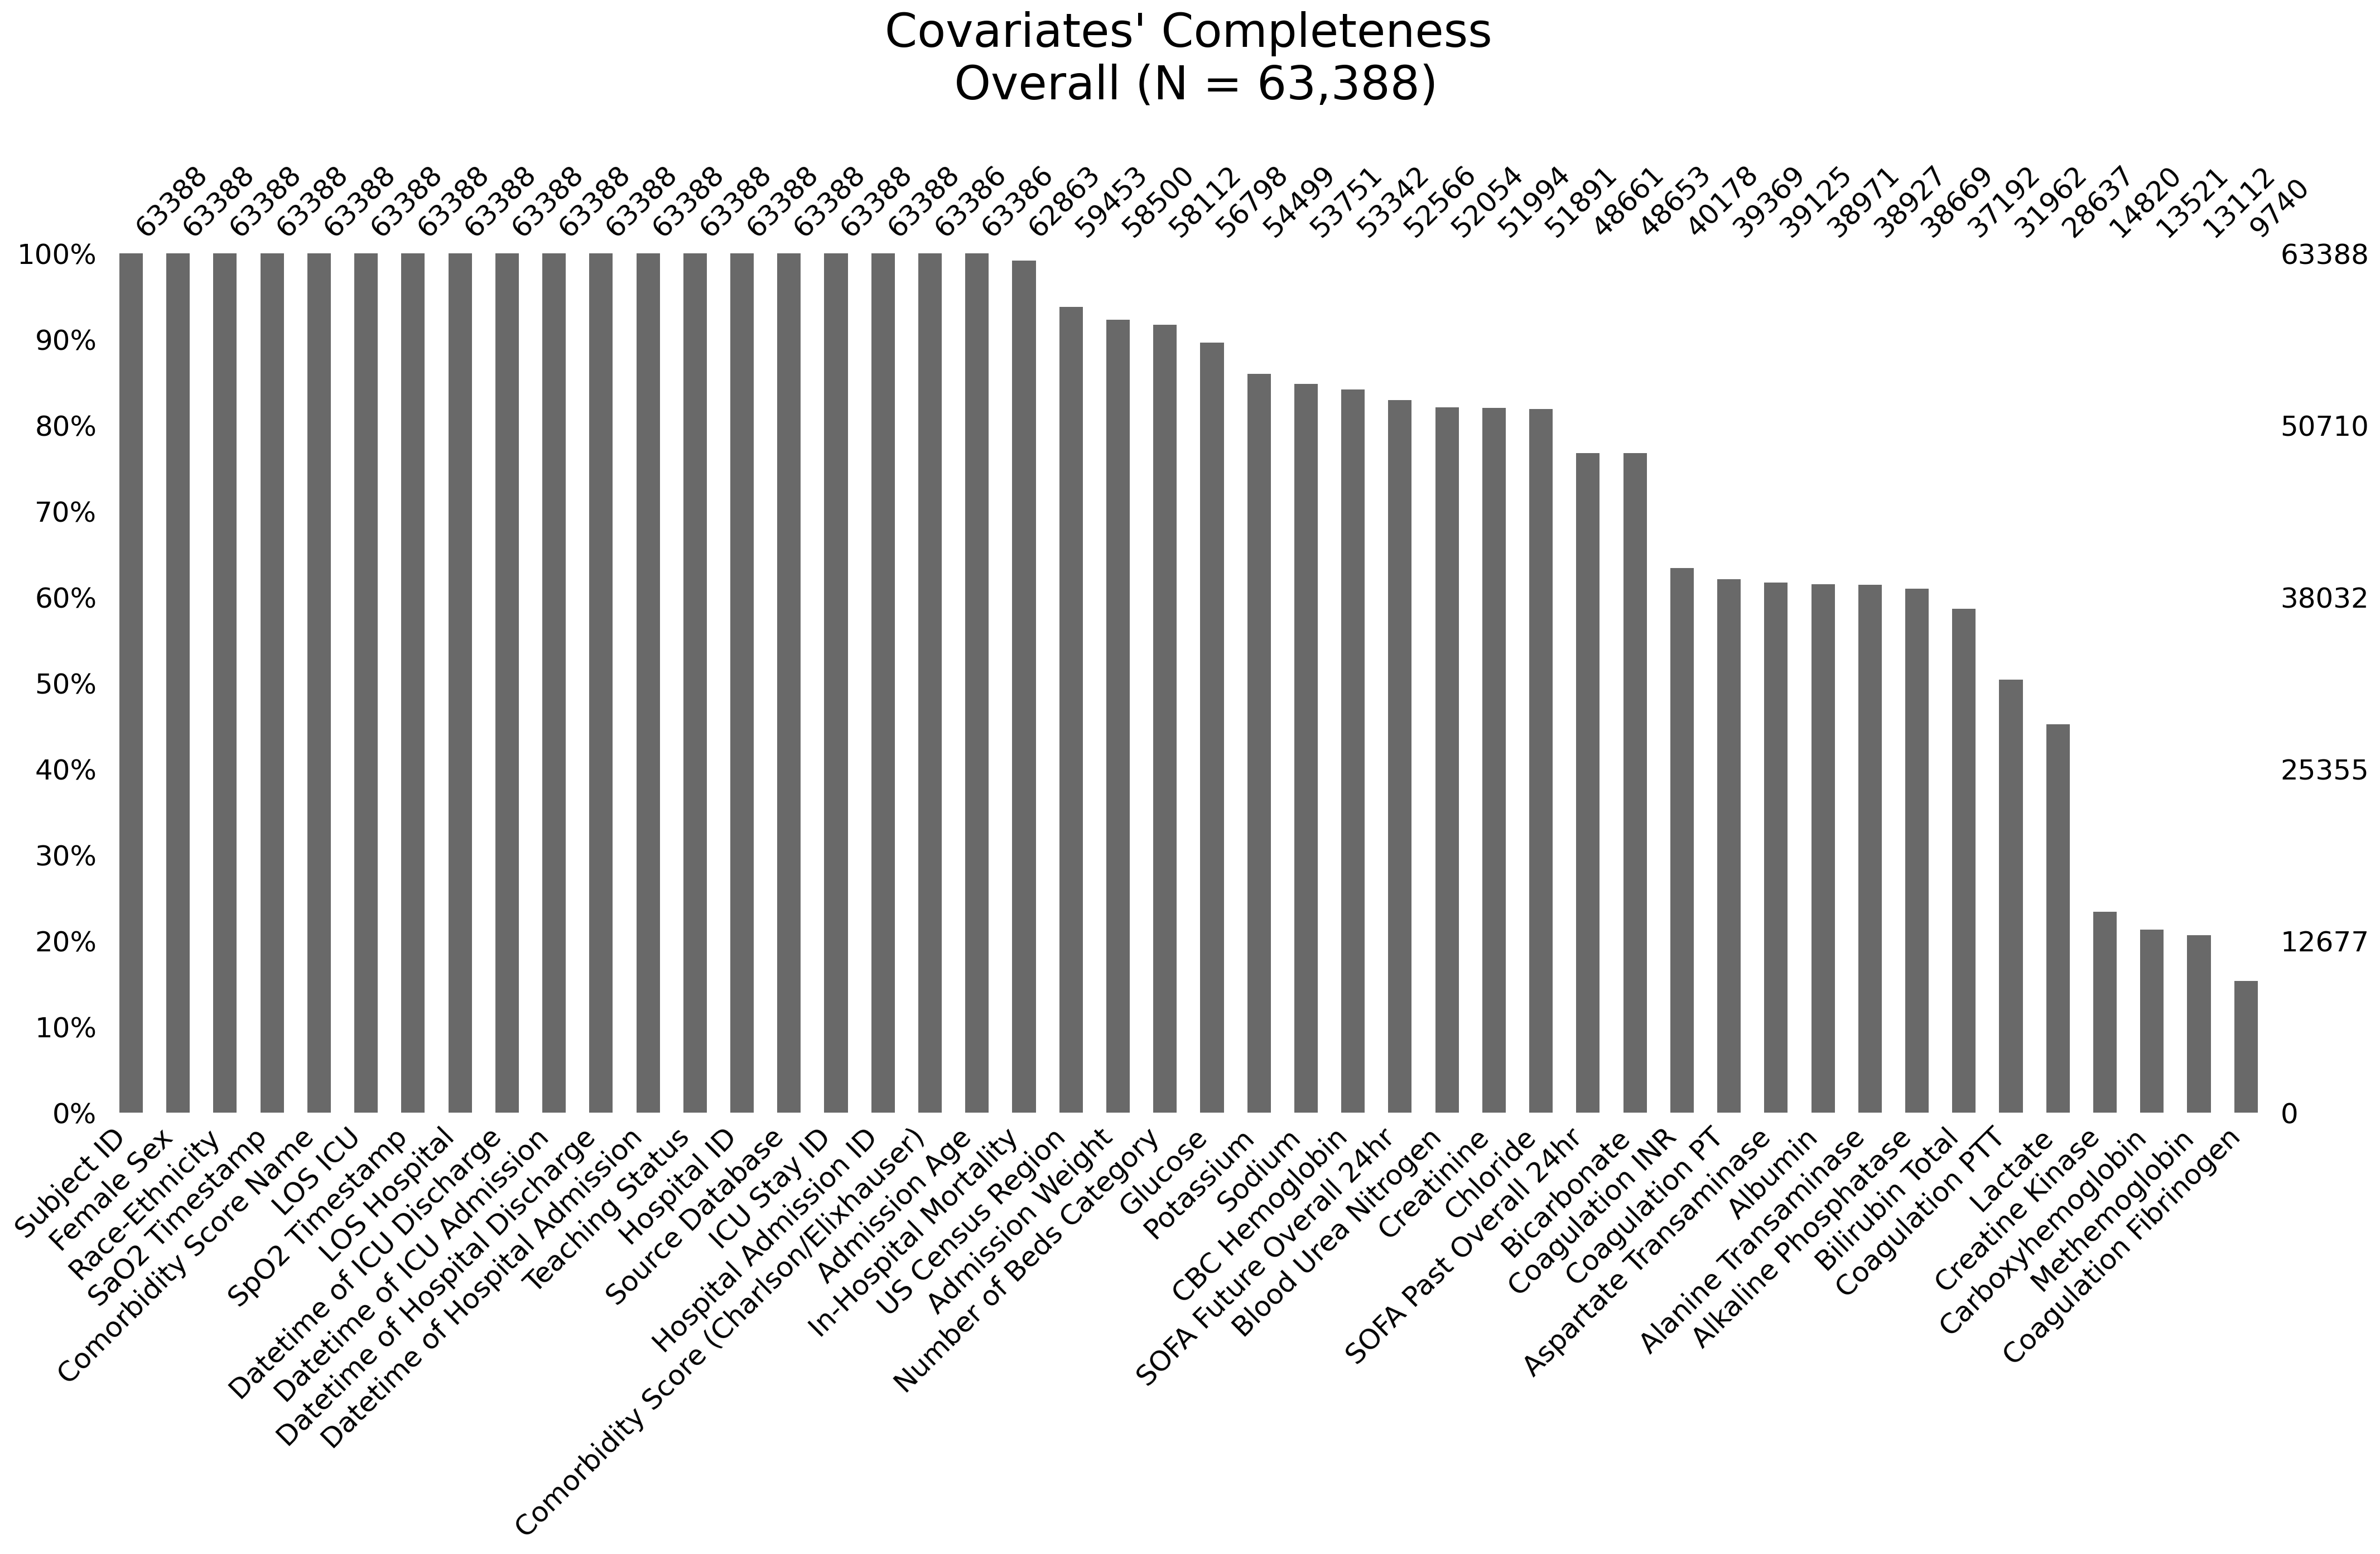

In [28]:
plot_missingness(bold)

## per race and ethnicity

### Asian

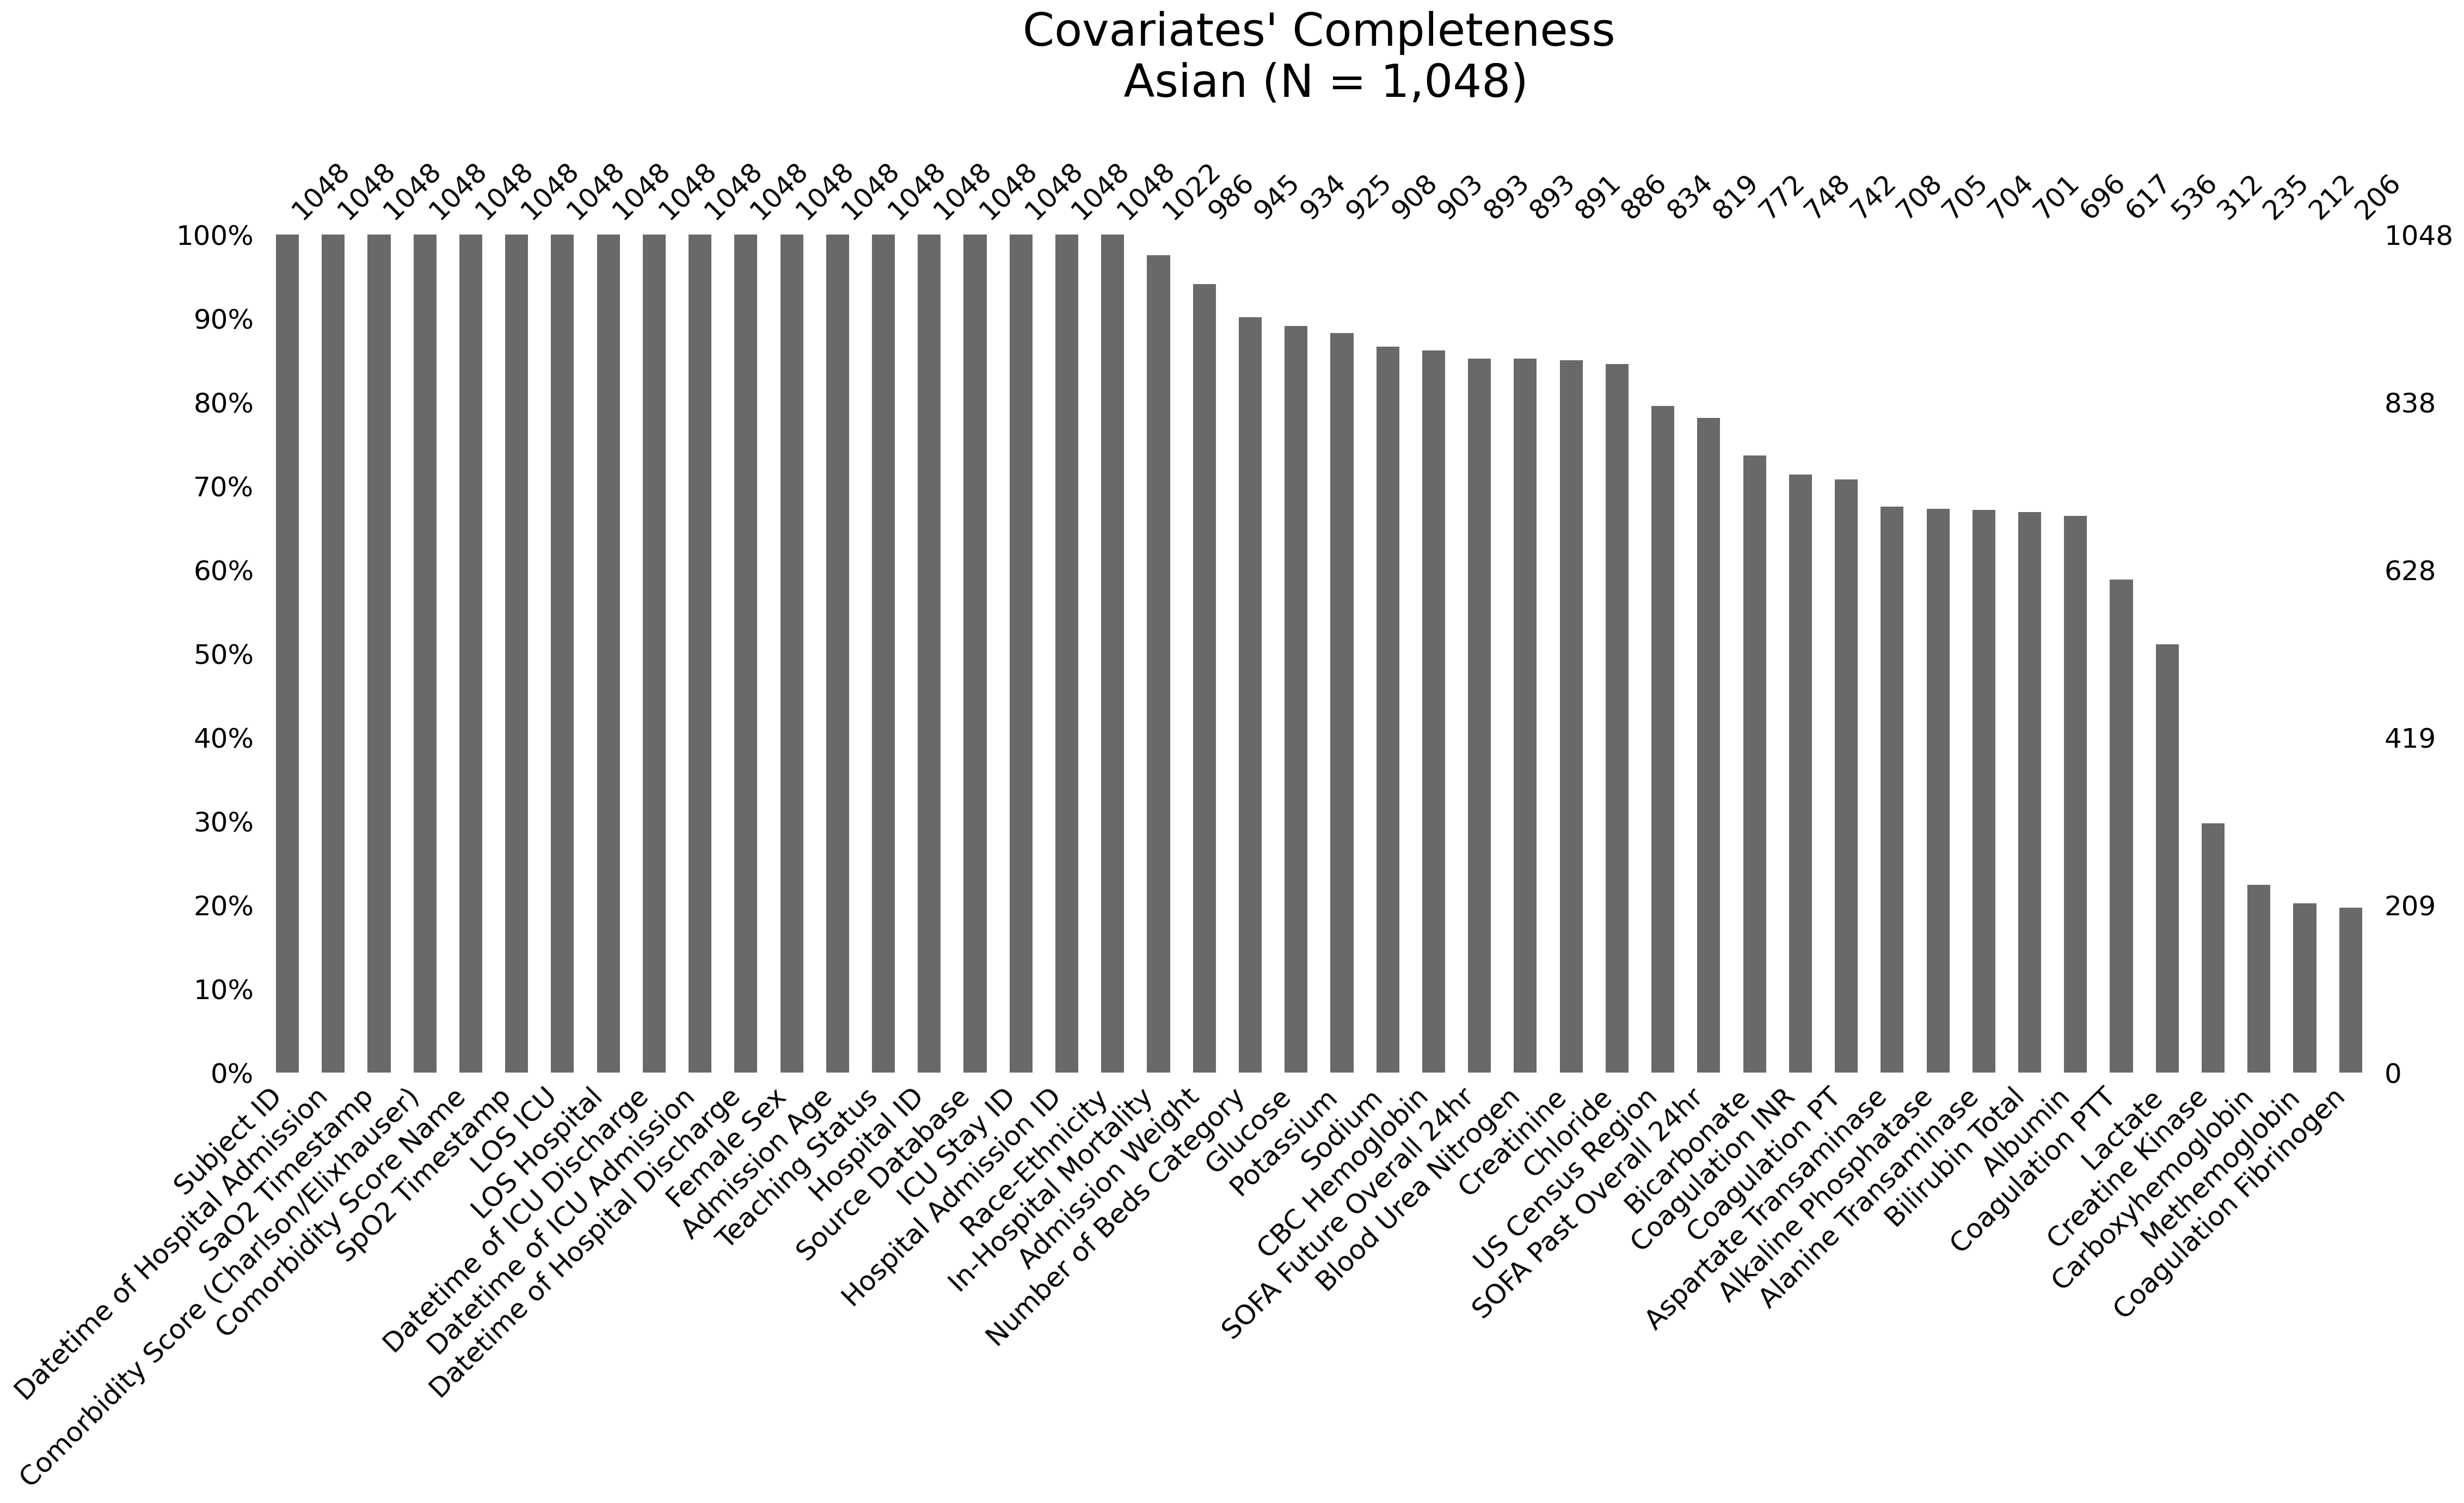

In [29]:
plot_missingness(bold.loc[bold.race_ethnicity == "Asian"], "Asian")

### Black

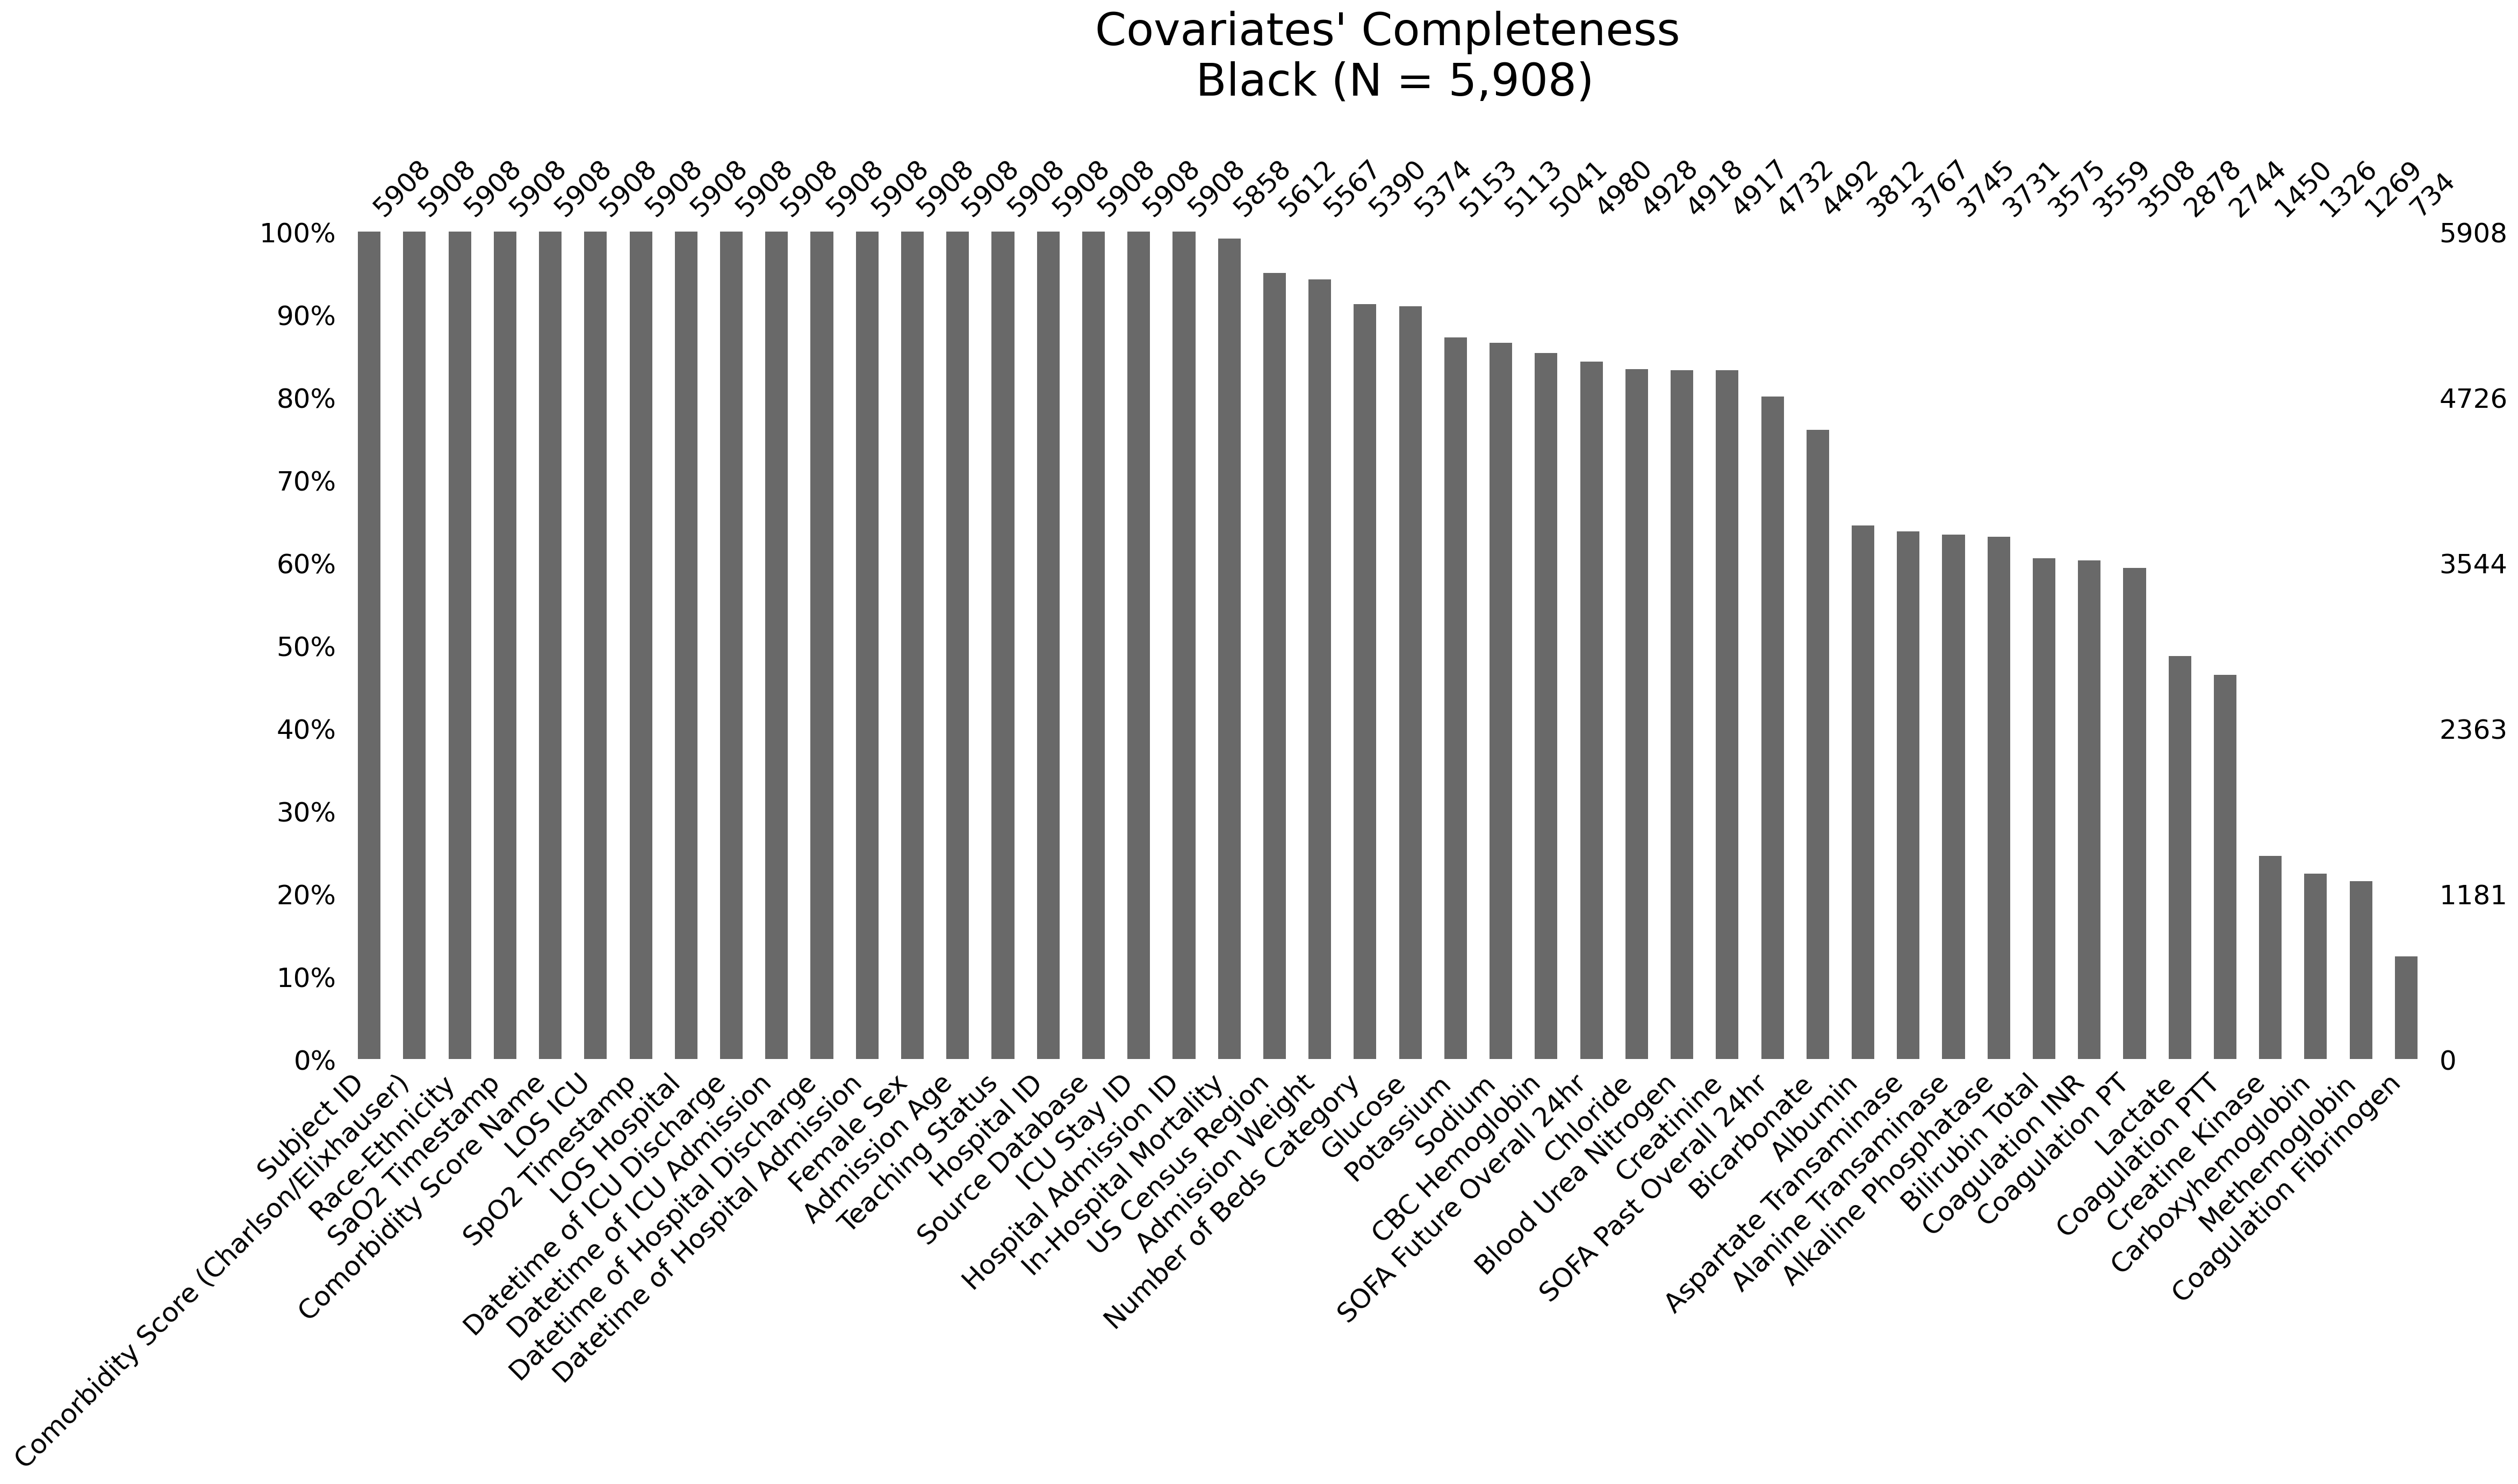

In [30]:
plot_missingness(bold.loc[bold.race_ethnicity == "Black"], "Black")

### Hispanic OR Latino

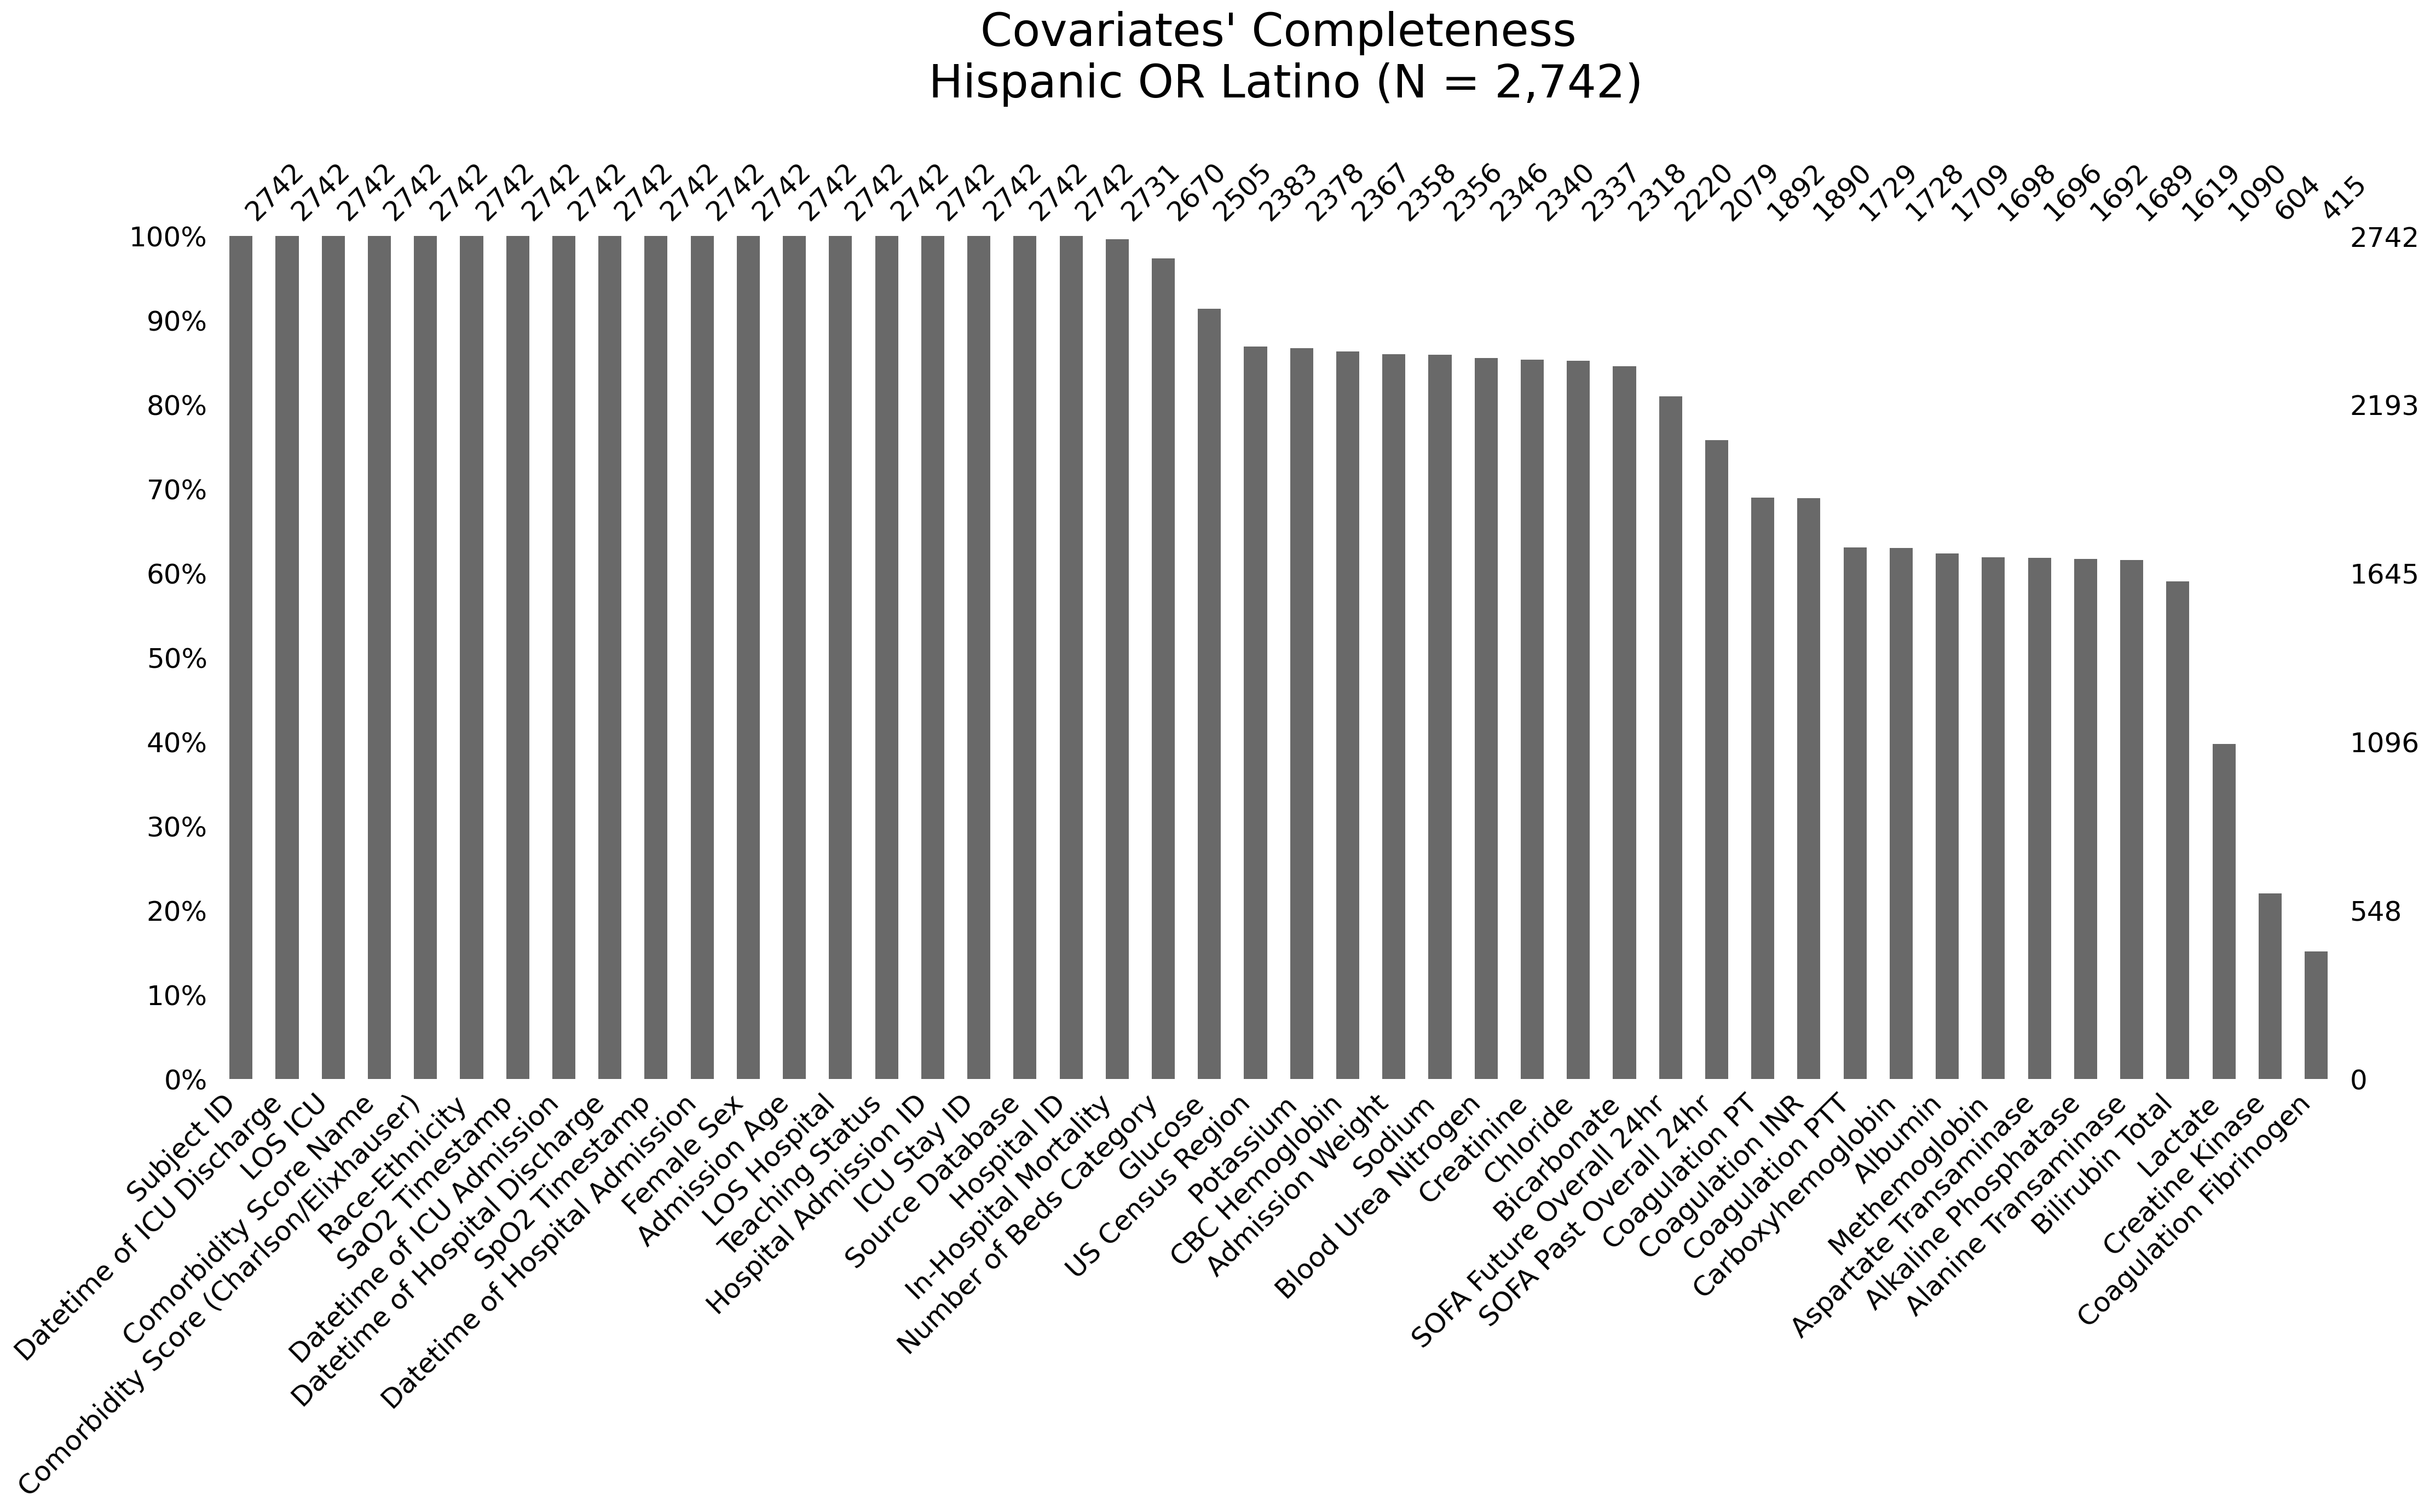

In [31]:
plot_missingness(bold.loc[bold.race_ethnicity == "Hispanic OR Latino"],
                 "Hispanic OR Latino")

### White

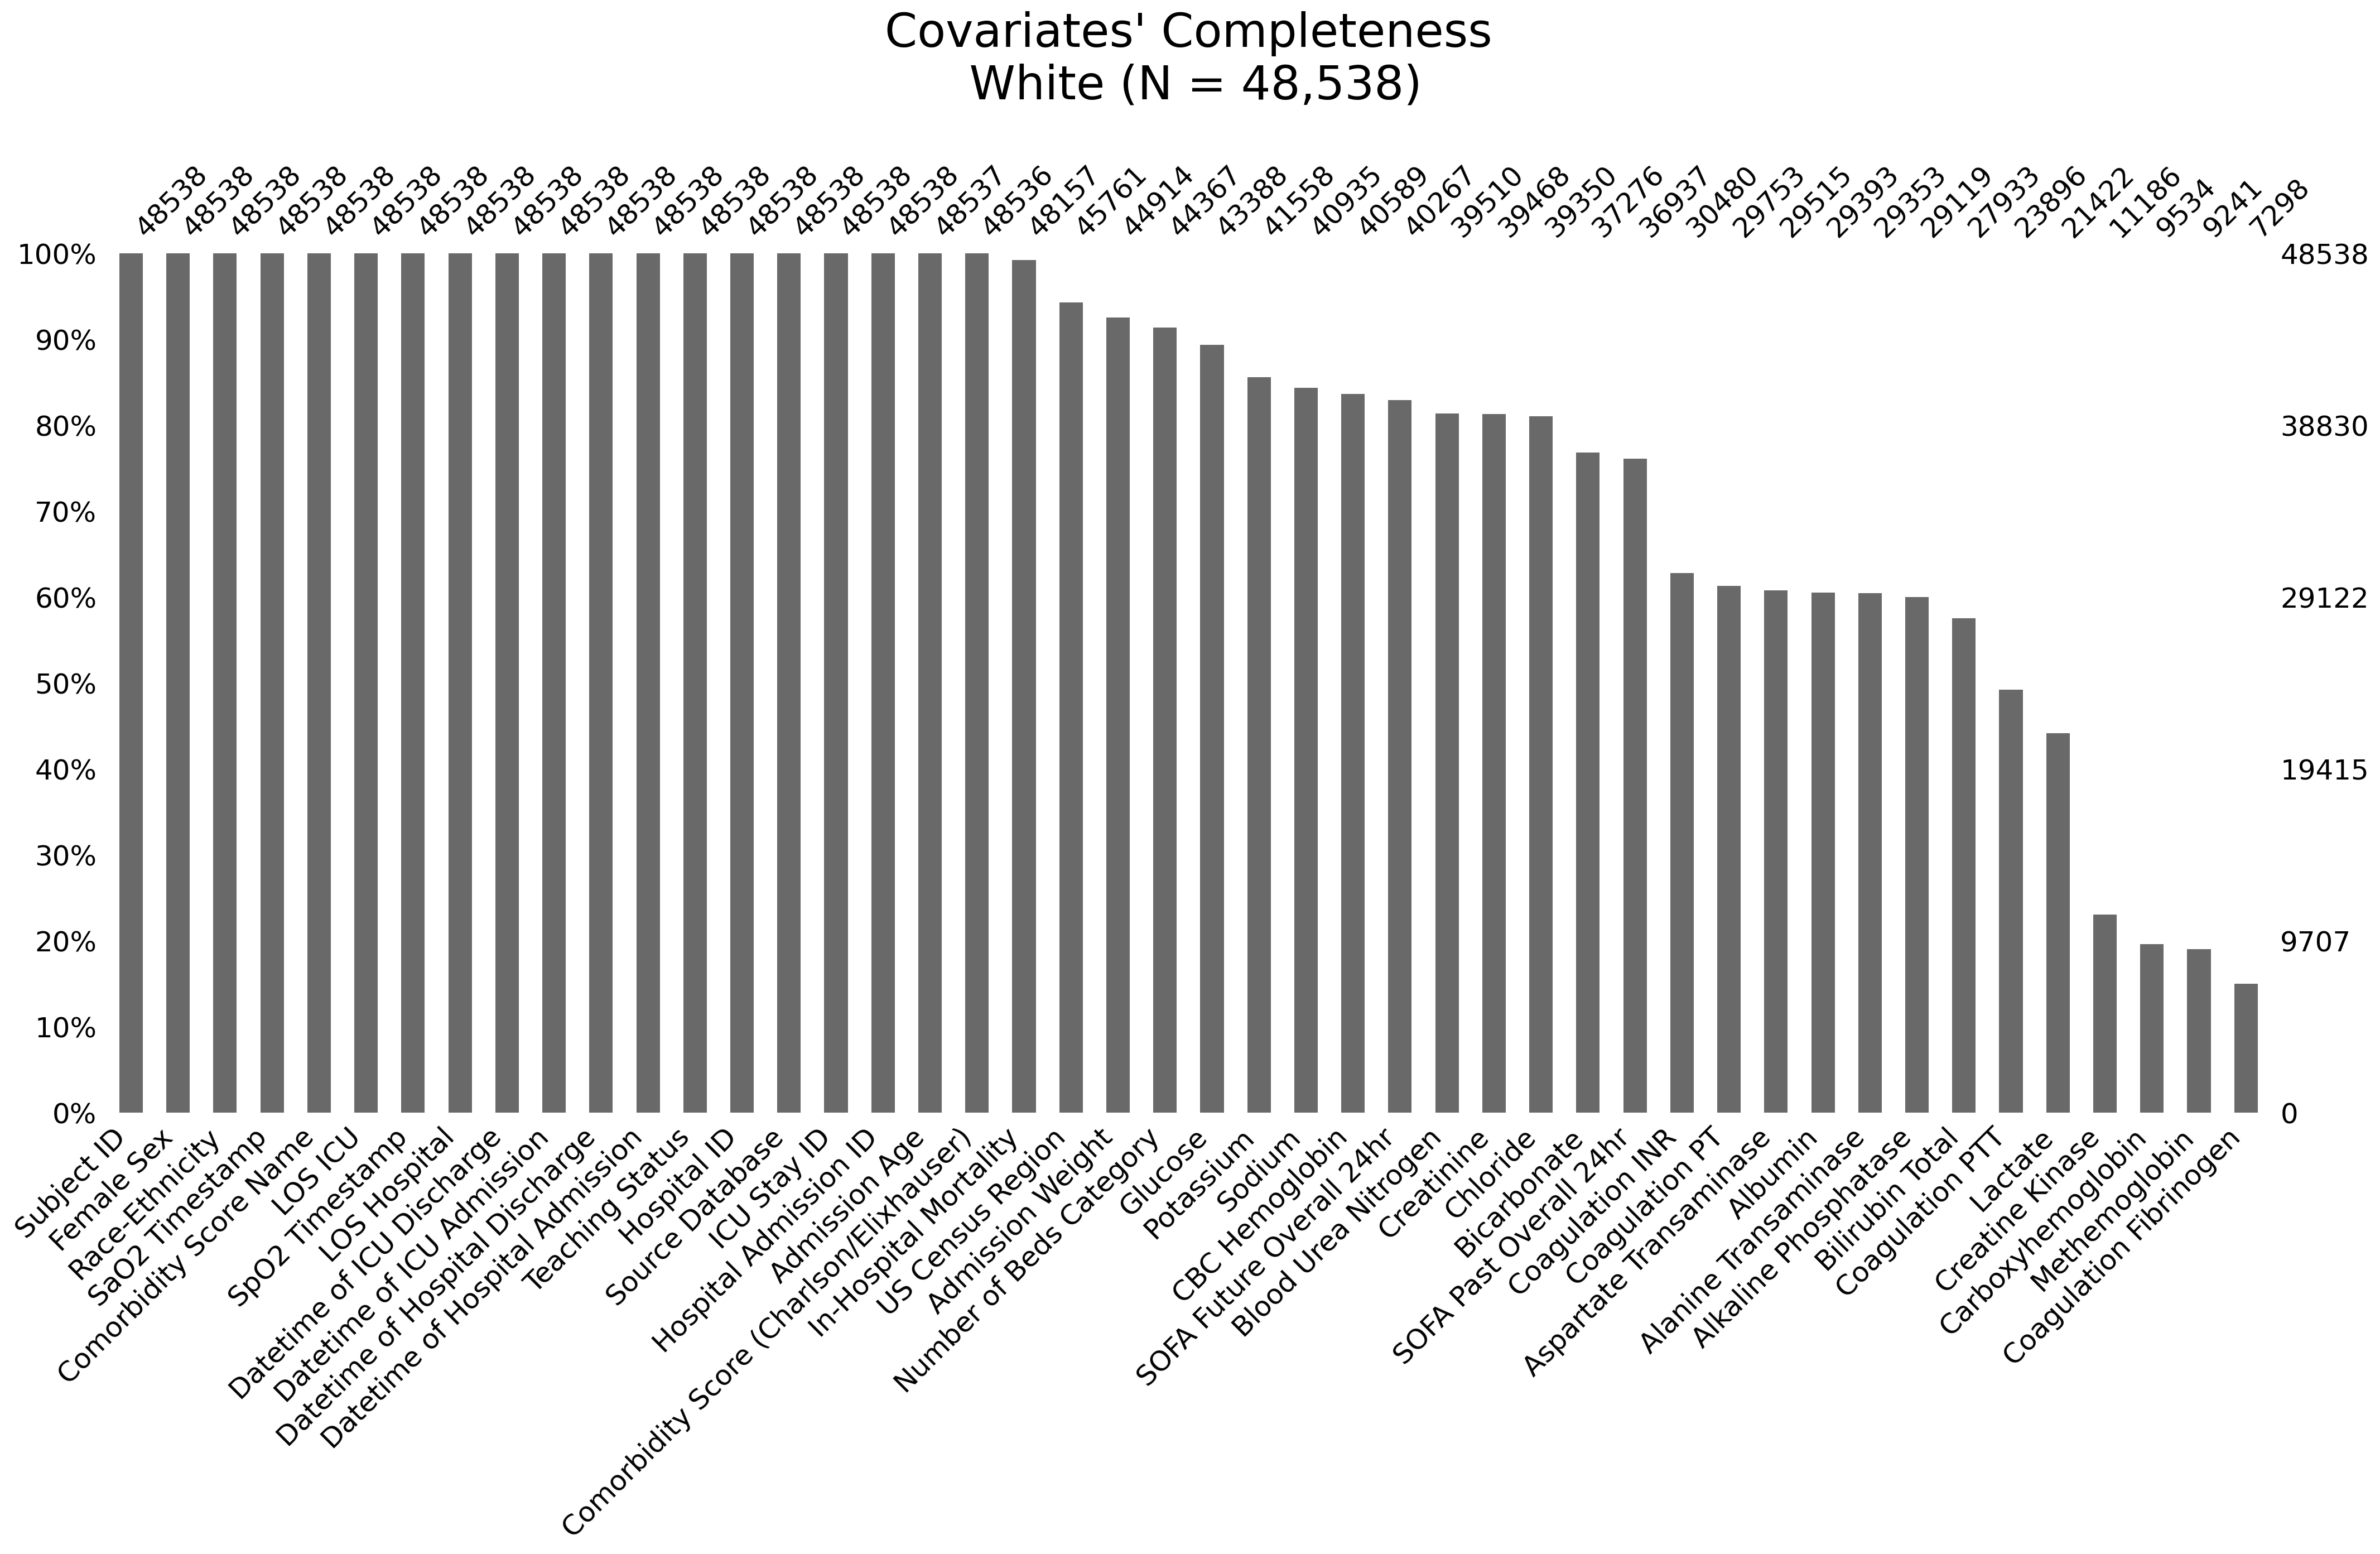

In [32]:
plot_missingness(bold.loc[bold.race_ethnicity == "White"], "White")